In [1]:
import json
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns
import datetime as dt
from scipy import stats
from sklearn.preprocessing import StandardScaler

<Axes: >

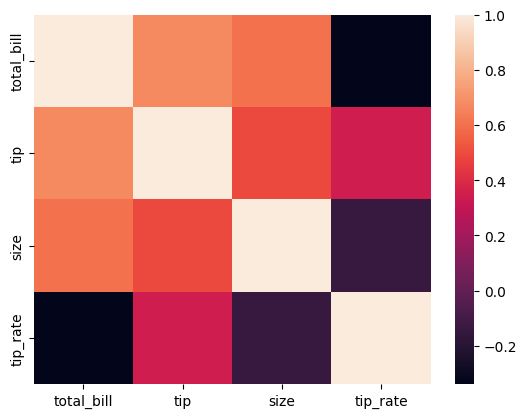

In [2]:
df=sns.load_dataset('tips')
df['tip_rate']=df['tip']/df['total_bill']
df=df[["total_bill", "tip", "size","tip_rate"]]
sns.heatmap(df.corr())

相関係数<br>
・共分散を標準化したもの<br>
・連続変数間の相関関係の強さ<br>
・カテゴリ変数間の相関

連関(association)<br>
・カテゴリ変数間の相関関係<br>
・分割表(contingency table)を用いて計算する<br>
・分割表内の数字を観測度数(observed frequency)という<br>
期待度数(expected frequencies)<br>
・連関がないと想定した場合の度数

カイニ乗<br>
・期待度数が期待値からどれくらい離れているかを計算した値<br>
・{(観測度数－期待度数)^2/期待度数}の総和

In [3]:
df=sns.load_dataset('tips')
pd.crosstab(df['sex'],df['time'])
cont_table=pd.crosstab(df['sex'],df['time'])
stats.chi2_contingency(cont_table,correction=False)

Chi2ContingencyResult(statistic=10.277251918677742, pvalue=0.0013468039268008764, dof=1, expected_freq=array([[ 43.75409836, 113.24590164],
       [ 24.24590164,  62.75409836]]))

クラメールの連関係数<br>
・連関の強さを表す<br>
・x^2を0~1に標準化した値

In [4]:
def cramers_v(x,y):
    cont_table=pd.crosstab(x,y)
    chi2=stats.chi2_contingency(cont_table,correction=False)[0]
    min_d=min(cont_table.shape)-1
    n=len(x)
    v=np.sqrt(chi2/(min_d*n))
    return v 

In [5]:
cramers_v(df['sex'],df['time'])

0.20523129613344476

#正規分布<br>
平均が0、分散が１

#68-95-99.7ルール<br>

In [6]:
group1=[]
group2=[]
group3=[]
samples=[]
loc=4
scale=3
for i in range(1000):
    sample=stats.norm(loc=loc,scale=scale).rvs()
    if loc-scale< sample <loc+scale:
        group1.append(sample)
    elif loc-2*scale< sample <loc+2*scale:
        group2.append(sample)
    elif loc-3*scale< sample <loc+3*scale:
        group3.append(sample)
    samples.append(sample)

In [7]:
len(group1)/len(samples)

0.703

In [8]:
(len(group1)+len(group2))/len(samples)

0.957

In [9]:
(len(group1)+len(group2)+len(group3))/len(samples)

0.998

偏差値とは<br>
平均50、標準偏差10を取る

標準正規分布<br>
平均0,分散1の正規分布(正規分布を標準化したもの)

##標準化<br>
sklearn.preprocessing.StandardScaler

In [10]:
scaler = StandardScaler()

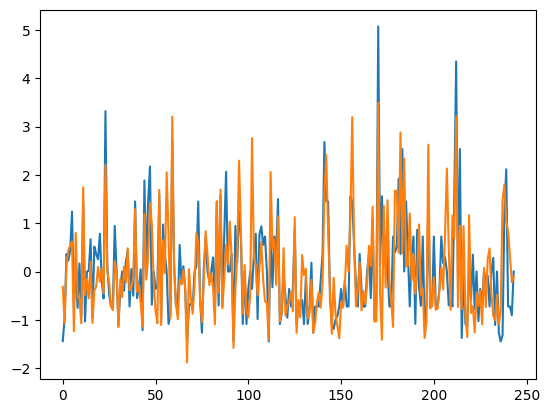

In [11]:
df=sns.load_dataset('tips')
df['tip_rate']=df['tip']/df['total_bill']
scaled=scaler.fit_transform(df['tip_rate'].values.reshape(-1,1))
df=sns.load_dataset('tips')
df['tip_rate']=df['tip']/df['total_bill']
df['tip_rate'].values.shape
plt.plot(scaler.fit_transform(df[['tip','total_bill']]))

二項分布

[0.5787037  0.34722222 0.06944444 0.00462963]


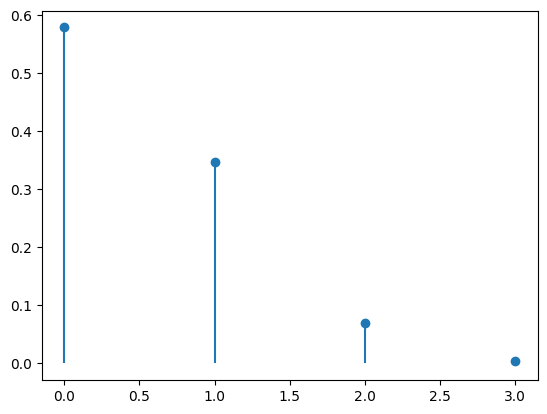

In [12]:
n=3
x=np.arange(n+1)
y=stats.binom(n=n, p=1/6).pmf(x)
print(y)
plt.plot(x,y,'o')
plt.vlines(x,0,y)

In [13]:
stats.binom(n=100,p=1/6).pmf(x)

array([1.20746735e-08, 2.41493469e-07, 2.39078535e-06, 1.56197976e-05])

二項分布->正規分布

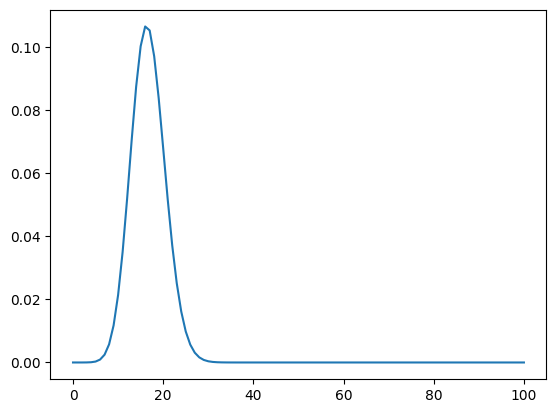

In [14]:
n=100
p=1/6
x=np.arange(n+1)
y=stats.binom(n,p).pmf(x)
plt.plot(x,y,)

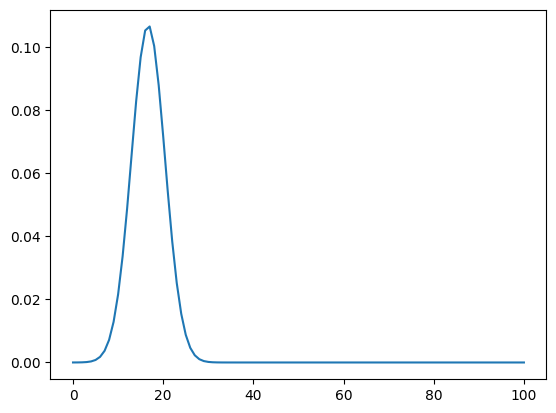

In [15]:
y2=stats.norm(loc=n*p,scale=np.sqrt(n*p*(1-p))).pdf(x)
plt.plot(x,y2)

In [16]:
#平均=np
stats.binom(n,p).mean()

16.666666666666664

In [17]:
n*p

16.666666666666664

In [18]:
stats.binom(n,p).var()

13.888888888888888

In [19]:
n*p*(1-p)

13.888888888888888

標本統計量と母数<br>
・分布の特徴を表す値を統計量という(平均や標準偏差など）<br>
・標本から計算された統計量を標本統計量という<br>
・母集団の統計量を母数という。

標本分布<br>
・標本の中身は確率的に変動する<br>
・標本統計量も同様に確率的に変動する<br>
・標本統計量が従う確率分布を標本分布という。

推定量<br>
・母集団の推定に使う標本統計量を推定量という<br>
・実際の値を推定量という。

不偏性<br>
・推定量が平均的に母数と一致する場合、その推定は不偏性があるという<br>
・不偏性がある推定量を不偏推定量と呼ぶ<br>
・確率の文脈では平均のことを期待値という

平均の標本分布<br>
・平均の標本分布の平均は母平均と同じになる<br>
・平均の標本分布の分散は母分散をnで割った値になる。

In [20]:
df=sns.load_dataset('tips')
df['tip_rate']=df['tip']/df['total_bill']
m=100
n=50
sample_means=[]
column='total_bill'
for i in range(m):
    sample_df=df.sample(n)
    sample_mean=sample_df[column].mean()
    sample_means.append(sample_mean)

In [21]:
np.mean(sample_means)

19.820845999999996

In [22]:
df[column].mean()

19.78594262295082

In [23]:
np.var(sample_means)

1.3313517766840002

In [24]:
np.var(sample_means)

1.3313517766840002

In [25]:
np.var(df[column])/n

1.5785626297702229

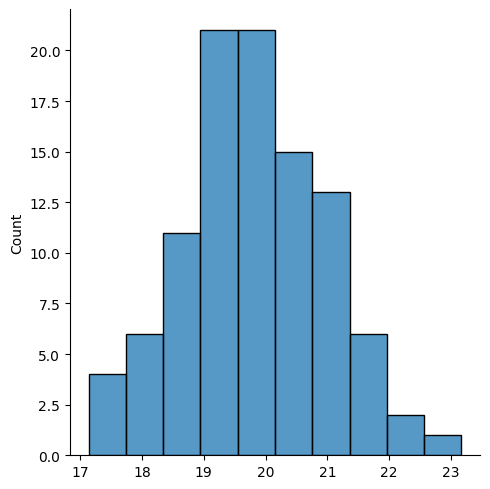

In [26]:
sns.displot(sample_means)

不偏分散<br>

・母分散の不偏推定量<br>

・不偏分散は、分散の式においてnではなくn-1を使う<br>

・通常の標本分散をs^2で表し、不偏分散をs'^2で表す<br>

・分散だと標本の平均であるので値が小さくなってしまうのでn-1で割る

In [27]:
stats.tvar(df['tip'])

1.914454638062471

In [28]:
np.var(df['tip'],ddof=1)

1.914454638062471

In [29]:
np.sqrt(stats.tvar(df['tip']))

1.3836381890011822

In [30]:
stats.tstd(df['tip'])

1.3836381890011822

In [31]:
np.std(df['tip'])

1.3807999538298954

In [32]:
np.std(df['tip'],ddof=1)

1.3836381890011822

In [33]:
#普遍分散の普遍性

In [34]:
df=sns.load_dataset('tips')
df['tip_rate']=df['tip']/df['total_bill']
m=10000
n=50
sample_means=[]
sample_vars=[]
column='tip'
for i in range(m):
    sample_df=df.sample(n)
    sample_mean=sample_df[column].mean()
    sample_var=sample_df[column].var()
    sample_uver=stats.tvar(sample_df[column])
    sample_means.append(sample_mean)
    sample_vars.append(sample_var)

In [35]:
#標本の普遍分散の平均
np.mean(sample_uver)

1.6039969387755102

In [36]:
#母分散
np.mean(sample_vars)

1.9096120377061228

In [37]:
#標本の分散の平均
np.var(df[column],ddof=1)

1.914454638062471

#推測統計<br>
・推定と検定<br>
・推定とは母集団から標本を採って母集団の推定値を計測する<br>
・検定とは標本同士の平均、比率分散などは同じか？<br>
・点推定　一つの値で推定<br>
・区間推定　母数を区間で推定


#比率の区間推定<br>